<a href="https://colab.research.google.com/github/FunmiSomoye/School-Projects/blob/master/Funmi_dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Formative Assessment

### Funmi Somoye

### The goal

The goal of the assignment is to predict active power of a wind turbine using several input features. The data comes from a wind farm in France, [La Haute Borne Data (2013-2016)](https://opendata-renewables.engie.com/explore/dataset/la-haute-borne-data-2013-2016/table/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImxhLWhhdXRlLWJvcm5lLWRhdGEtMjAxMy0yMDE2Iiwib3B0aW9ucyI6e319LCJjaGFydHMiOlt7InR5cGUiOiJsaW5lIiwiZnVuYyI6IkFWRyIsInlBeGlzIjoiYmFfYXZnIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzY2YzJhNSJ9XSwieEF4aXMiOiJkYXRlX3RpbWUiLCJtYXhwb2ludHMiOiIiLCJ0aW1lc2NhbGUiOiJ5ZWFyIiwic29ydCI6IiJ9XX0%3D). A total of 139 features are included in the dataset, with several measures of the same feature. For instance, the active power feature is split into the following measurements: `P_min, P_max, P_avg, P_std`. 

The overall tasks are the following:

1. Use a random forest regressor to predict power output. 
2. Perform dimension reduction using PCA.
2. Perform cross validation to determine how well the model generalises. 
3. Determine the importance of the features.
4. Determine the performance of the models as well.

The notebook will guide you as to how to go about fulfilling these overall tasks by doing other smaller subtasks.

Note that the dataset is very large, with 139 columns, so using a bit of domain knowledge we identified the following features that could be using in predicting wind turbine power output. Add to the feature subset as you build the model.



### Load the data

Import the necessary libraries and load the data. Once loaded, investigate the data. There are two files: `data_description.csv` lists the variables or features of the dataset. The file `wind-data.csv` contains the data (`wind-data-truncated.csv` if downloaded from the LMS, due to file size limits).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
%matplotlib inline 
# display graphs in Jupyter notebook

Load both the `data_description.csv` and `wind-data.csv` files.

In [ ]:
#load description file
data_d = pd.read_csv('data_description.csv', sep=';')
data_d

,Variable_name,Variable_long_name,Unit_long_name,Comment
0,Va2,Vane_position_2,deg,Second wind vane on the nacelle
1,Ws2,Wind_speed_2,m/s,Second anemometer on the nacelle
2,Ws,Wind_speed,m/s,Average wind speed
3,Wa_c,Absolute_wind_direction_corrected,deg,NaN
4,Na_c,Nacelle_angle_corrected,deg,NaN
5,Ot,Outdoor_temperature,deg_C,NaN
6,Yt,Nacelle_temperature,deg_C,NaN
7,Nf,Grid_frequency,Hz,NaN
8,Nu,Grid_voltage,V,NaN
9,Rm,Torque,Nm,NaN


In [ ]:
#load data
data = pd.read_csv('wind-data-truncated.csv', parse_dates=['Date_time']) 
data.head(5)

,Unnamed: 0,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,804808,R80711,2013-04-06 14:20:00,-0.940000,-0.950000,-0.940000,0.0,10.59,10.000000,11.0,...,NaN,NaN,358.870000,NaN,NaN,NaN,351.670010,NaN,NaN,NaN
1,732424,R80711,2015-12-22 14:30:00,-0.990000,-0.990000,-0.990000,0.0,17.00,17.000000,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,312987,R80711,2016-03-20 20:40:00,-0.990000,-0.990000,-0.990000,0.0,12.88,12.000000,13.0,...,NaN,NaN,44.849998,NaN,NaN,NaN,44.849998,NaN,NaN,NaN
3,68152,R80711,2016-01-09 01:00:00,45.000000,45.000000,45.000000,0.0,12.95,12.000000,13.0,...,NaN,NaN,243.020000,NaN,NaN,NaN,243.020000,NaN,NaN,NaN
4,231878,R80721,2014-12-14 13:20:00,44.990002,44.990002,44.990002,0.0,16.99,16.110001,17.0,...,NaN,NaN,195.060000,NaN,NaN,NaN,308.239990,NaN,NaN,NaN


__Helpful hint__: Load the data into a dataframe. Use the `parse_dates=['Date_time']` argument in the `read_csv` function in order to display dates in later plots.

### Explore the data

Once you've loaded the data into a pandas dataframe, explore the data. You may start by generating summary statistics, identifying any missing values, and filling in missing values. Generate visualizations of the features as a way to start understanding the distribution of the data.

In [ ]:
#see size of the dataset
data.shape 

(25000, 139)

Data has 25000 rows and 139 columns

In [ ]:
data.info() #view information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Columns: 139 entries, Unnamed: 0 to Na_c_std
dtypes: datetime64[ns](1), float64(136), int64(1), object(1)
memory usage: 26.5+ MB


Data has 136 columns with 'float' values, 1 column with '64bits integer' values, 1 column with 'object' values and 1 'datetime' column

In [ ]:
#conduct summary statistics on data
data.describe()

,Unnamed: 0,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
count,25000.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,...,0.0,0.0,24023.000000,0.0,0.0,0.0,24023.000000,0.0,0.0,0.0
mean,420690.593400,13.908417,12.809536,15.365060,0.860982,19.315983,19.122009,19.535519,0.105912,1055.278639,...,NaN,NaN,178.370313,NaN,NaN,NaN,179.284643,NaN,NaN,NaN
std,242467.126033,28.292036,28.123074,28.840993,3.873753,6.183012,6.194615,6.186675,0.157304,626.559284,...,NaN,NaN,95.777425,NaN,NaN,NaN,95.969775,NaN,NaN,NaN
min,29.000000,-1.050000,-23.040001,-1.050000,0.000000,5.000000,4.940000,5.000000,0.000000,-574.880000,...,NaN,NaN,0.000000,NaN,NaN,NaN,0.080000,NaN,NaN,NaN
25%,211555.500000,-0.990000,-1.000000,-0.990000,0.000000,14.080000,14.000000,15.000000,0.000000,963.825015,...,NaN,NaN,86.075001,NaN,NaN,NaN,86.779999,NaN,NaN,NaN
50%,421692.500000,-0.970000,-0.990000,-0.500000,0.000000,19.000000,19.000000,19.000000,0.000000,1180.170000,...,NaN,NaN,195.190000,NaN,NaN,NaN,196.710010,NaN,NaN,NaN
75%,629736.500000,7.125000,-0.500000,44.980000,0.130000,24.000000,24.000000,24.000000,0.210000,1565.585000,...,NaN,NaN,248.300000,NaN,NaN,NaN,250.050000,NaN,NaN,NaN
max,840316.000000,117.130000,117.130000,161.770000,45.220001,39.000000,39.000000,39.000000,0.940000,1805.770000,...,NaN,NaN,359.950010,NaN,NaN,NaN,359.950010,NaN,NaN,NaN


There are generally large differences between min and max values for each feature. Thus, data is skewed
Max values are generally bigger than 75%, even showing extreme outliers for some features.

In [ ]:
print(data.columns) #see features in dataset

Index(['Unnamed: 0', 'Wind_turbine_name', 'Date_time', 'Ba_avg', 'Ba_min',
       'Ba_max', 'Ba_std', 'Rt_avg', 'Rt_min', 'Rt_max',
       ...
       'Pas_max', 'Pas_std', 'Wa_c_avg', 'Wa_c_min', 'Wa_c_max', 'Wa_c_std',
       'Na_c_avg', 'Na_c_min', 'Na_c_max', 'Na_c_std'],
      dtype='object', length=139)


It seems every feature mentioned in the description would have 4 variations: avg, min, max, and std

##### Generate Visualizations

Because we are investigating power output, the active power feature is given by the following features in  the dataset: `P_avg, P_min, P_max, P_std`. Decide on which active power feature to use (hint: perhaps the average or maximum would be a good place to start). Begin by using the function `groupby` to determine how many turbines there are in the dataset. The dataset is huge, so in order to visualize trends in power output, a simpler way would be to look at monthly trends in the data.

In [ ]:
#see the number of turbines in dataset
#one way to display the result is by getting the mean of all columns
data.iloc[:, 1:].groupby('Wind_turbine_name').mean() #take mean on all numeric columns

,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
Wind_turbine_name,,,,,,,,,,,,,,,,,,,,,
R80711,9.597272,8.486888,11.113723,0.878351,18.168351,18.001641,18.337944,0.084791,1161.693829,1047.606723,...,NaN,NaN,178.161997,NaN,NaN,NaN,178.556704,NaN,NaN,NaN
R80721,10.676144,9.449325,12.232524,0.963779,20.589091,20.380148,20.779581,0.099989,1075.919004,951.657201,...,NaN,NaN,177.334753,NaN,NaN,NaN,178.062631,NaN,NaN,NaN
R80736,10.713859,9.542455,12.176744,0.886450,19.363753,19.093775,19.742353,0.168733,1085.364718,970.459983,...,NaN,NaN,179.261964,NaN,NaN,NaN,180.526088,NaN,NaN,NaN
R80790,24.601396,23.713617,25.893020,0.715984,19.143273,19.012850,19.282821,0.070186,898.831886,804.564189,...,NaN,NaN,178.712917,NaN,NaN,NaN,179.978495,NaN,NaN,NaN


There are 4 turbines in the data

There is a wind turbine with `Wind_turbine_name` R80711. Use this column and determine the trend for the month of January.

In [ ]:
df_r80711 = data.loc[data['Wind_turbine_name'] == 'R80711'] #create new variable with data for desired turbine

In [ ]:
df_r80711 #view new data

,Unnamed: 0,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,804808,R80711,2013-04-06 14:20:00,-0.940000,-0.950000,-0.940000,0.00,10.590000,10.000000,11.000000,...,NaN,NaN,358.870000,NaN,NaN,NaN,351.670010,NaN,NaN,NaN
1,732424,R80711,2015-12-22 14:30:00,-0.990000,-0.990000,-0.990000,0.00,17.000000,17.000000,17.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,312987,R80711,2016-03-20 20:40:00,-0.990000,-0.990000,-0.990000,0.00,12.880000,12.000000,13.000000,...,NaN,NaN,44.849998,NaN,NaN,NaN,44.849998,NaN,NaN,NaN
3,68152,R80711,2016-01-09 01:00:00,45.000000,45.000000,45.000000,0.00,12.950000,12.000000,13.000000,...,NaN,NaN,243.020000,NaN,NaN,NaN,243.020000,NaN,NaN,NaN
5,358331,R80711,2013-11-13 14:30:00,-0.940000,-0.950000,-0.940000,0.00,13.000000,12.760000,13.000000,...,NaN,NaN,24.370001,NaN,NaN,NaN,36.509998,NaN,NaN,NaN
6,103717,R80711,2014-11-03 21:20:00,-0.650000,-0.990000,3.740000,0.78,20.000000,20.000000,20.000000,...,NaN,NaN,215.820010,NaN,NaN,NaN,219.960010,NaN,NaN,NaN
16,193847,R80711,2013-09-29 11:40:00,-0.460000,-1.010000,0.500000,0.49,22.000000,22.000000,22.000000,...,NaN,NaN,36.919998,NaN,NaN,NaN,36.669998,NaN,NaN,NaN
22,514081,R80711,2016-06-25 02:20:00,-0.990000,-0.990000,-0.990000,0.00,27.000000,27.000000,27.240000,...,NaN,NaN,301.840000,NaN,NaN,NaN,301.840000,NaN,NaN,NaN
37,197753,R80711,2013-12-01 03:00:00,-0.990000,-1.000000,-0.990000,0.00,11.060000,11.000000,12.000000,...,NaN,NaN,22.480000,NaN,NaN,NaN,30.080000,NaN,NaN,NaN
41,182417,R80711,2014-04-29 01:30:00,-0.990000,-0.990000,-0.990000,0.00,18.000000,18.000000,18.000000,...,NaN,NaN,262.620000,NaN,NaN,NaN,250.870000,NaN,NaN,NaN


In [ ]:
#For better analysis, convert to time series - use datetime as index
df_r80711.index = df_r80711['Date_time'] #set datetime column as index

Text(0.5, 0, 'January 2016(weekly)')

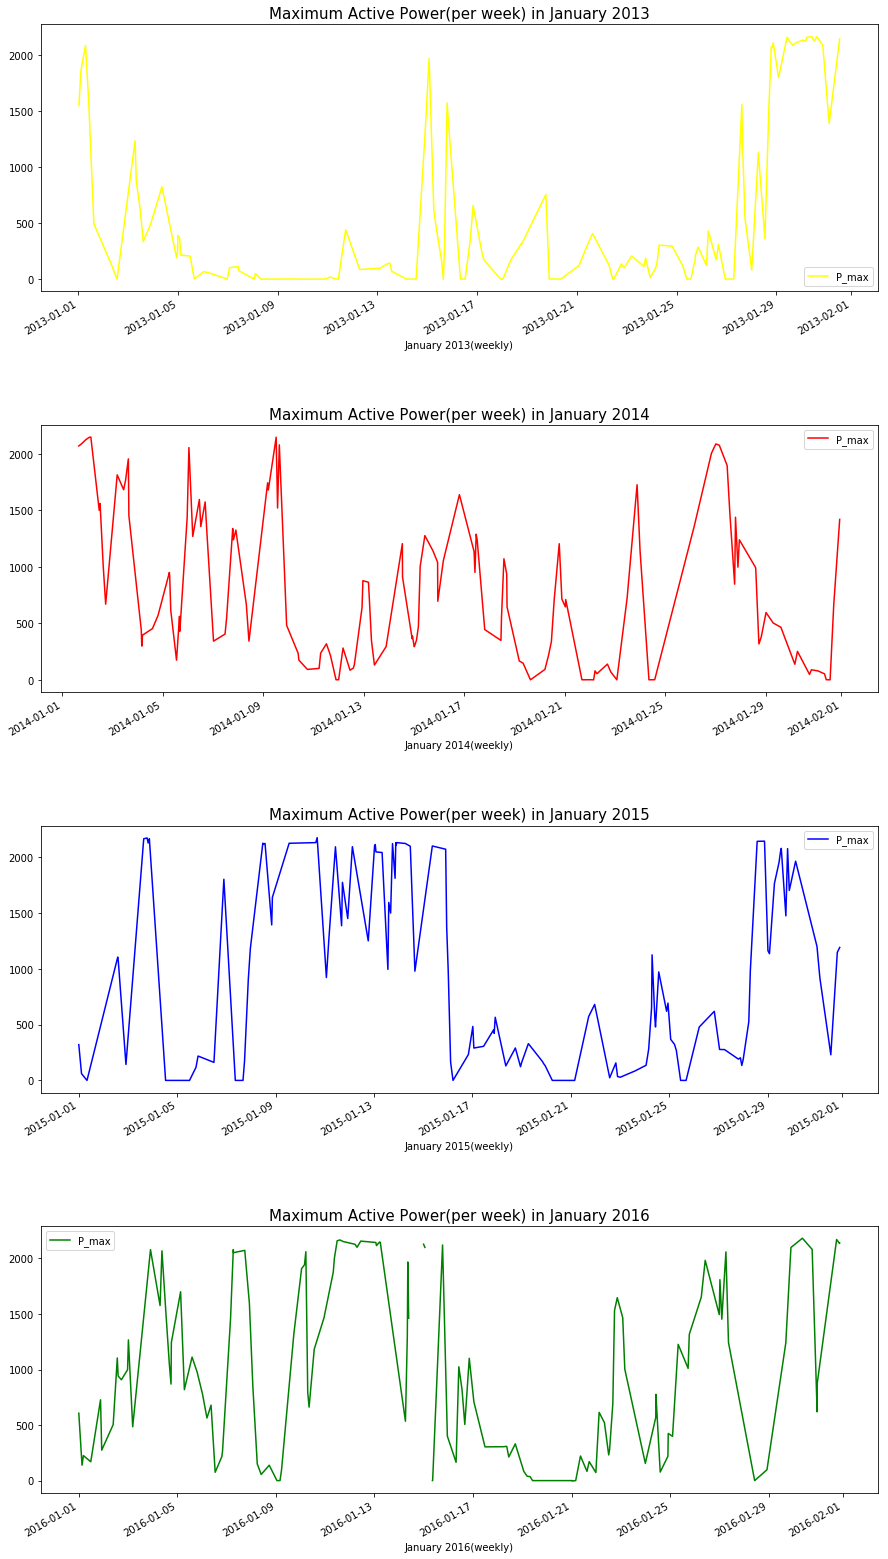

In [ ]:
#using P_max
#Get all months of January into variables
jan_13 = df_r80711['2013-01-01':'2013-01-31']
jan_14 = df_r80711['2014-01-01':'2014-01-31']
jan_15 = df_r80711['2015-01-01':'2015-01-31']
jan_16 = df_r80711['2016-01-01':'2016-01-31']

## resampling over week and computing means
fig, ax=plt.subplots(4,1, figsize=(15,30)) 
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)#add space between subplots

#Don't use average because of presence of outliers and missing values. It would not be a good approximate representation.
#Use p_max instead
jan_13.P_max.plot(color='yellow', ax=ax[0], legend=True)
jan_14.P_max.plot(color='red', ax=ax[1], legend=True)
jan_15.P_max.plot(color='blue', ax=ax[2], legend=True)
jan_16.P_max.plot(color='green', ax=ax[3], legend=True)

#Set plot titles for each graph
ax[0].set_title('Maximum Active Power(per week) in January 2013', size = 15)
ax[1].set_title('Maximum Active Power(per week) in January 2014', size = 15)
ax[2].set_title('Maximum Active Power(per week) in January 2015', size = 15)
ax[3].set_title('Maximum Active Power(per week) in January 2016', size = 15)

#set plot x-axis labels 
ax[0].set_xlabel('January 2013(weekly)')
ax[1].set_xlabel('January 2014(weekly)')
ax[2].set_xlabel('January 2015(weekly)') 
ax[3].set_xlabel('January 2016(weekly)')

It is definitely a continuous data.
The plot shows that power output in January generally increased over the years. There is also a generally low output around the third week of January

Before working on the data, I would like to focus activities on features with higher chances of having impact on the power output. I have decide to work with the Maximum power output, thus, I would be selecting the maximum of whatever feature I choose to work with.

#####  Feature Selection

Power output is determined by many features. But since we have a dataset with 138 columns, we need to select the main features that are most likely to influence the turbine power output.

Using information from research on Predicting Wind Turbine power, I'll consider:
NB: Nacelles are not the best measures for windspeed    

    Va2_max - vine position 2 (deg),
    Ws1_max - wind speed 1 (m/s) First anemometer on the nacelle
    Ws2_max - wind speed 2 (m/s) Second anemometer on the nacelle
    Ws_max - wind speed, #because there are two anemometers on the turbine
    Ot - Outdoor_temperature - deg_C 
    Rm - Torque - (Nm) #Although not sure what this torque is for, force of the wind is an important factor
    Rs - Rotor_speed - rpm #The bigger the rotor, the more power it can produce. Rotor is a factor to predict power output. 

In [ ]:
data_2 = data[['Date_time', 'Wind_turbine_name', 'P_max', 'Ws1_max', 'Ws2_max', 'Ws_max', 'Ot_max', 'Rm_max', 'Rs_max']]

In [ ]:
data_2.head()

,Date_time,Wind_turbine_name,P_max,Ws1_max,Ws2_max,Ws_max,Ot_max,Rm_max,Rs_max
0,2013-04-06 14:20:00,R80711,679.60999,9.17,9.21,9.16,3.5,3734.0701,16.620001
1,2015-12-22 14:30:00,R80711,727.02002,9.05,9.44,9.12,11.8,3908.2400,17.030001
2,2016-03-20 20:40:00,R80711,387.01001,7.80,7.58,7.60,4.1,2537.3301,13.900000
3,2016-01-09 01:00:00,R80711,0.00000,2.39,2.98,2.69,5.0,0.0000,0.370000
4,2014-12-14 13:20:00,R80721,-1.02000,0.00,0.00,0.00,6.8,0.0000,0.000000


### Find missing values

A dataset with missing values will not be usable for fitting and testing a model. Fill in missing values in a way suitable for the model.

In [ ]:
#see amount of missing values per column
data_2.isnull().sum(axis=0) 

Date_time              0
Wind_turbine_name      0
P_max                137
Ws1_max              137
Ws2_max              137
Ws_max               137
Ot_max               137
Rm_max               137
Rs_max               137
dtype: int64

In [ ]:
#check for outliers to determine method for filling Missing values of remaining columns

data2_num = data_2.iloc[:, 2:] #save numerical columns in new variable

#solve for IQR
Q1 = data2_num.quantile(0.25)
Q3 = data2_num.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)


#Store new variables into dataframes.
#Create new Dataframes and define columns
l = pd.DataFrame(data=lower_bound, columns=['low_bound'])
u = pd.DataFrame(data=upper_bound, columns=['upp_bound'])

m = data2_num.min()#minimum of column values
minimum = pd.DataFrame(data=m, columns=['min'])

n = data2_num.max()#maximum of column values
maximum = pd.DataFrame(data=n, columns=['max'])


#merge new dataframes into one
#give random variable names leading to final one
k=l.join(minimum, how='outer')
d=k.join(u, how='outer')
outliers=d.join(maximum, how='outer')

#now check if there are outliers
def check(outliers):
    if outliers['min'] < outliers['low_bound'] or outliers['max'] > outliers['upp_bound']:
        print ('True')
    else:
        print ('False')
outliers['check'] = outliers.apply(check, axis=1)


True
True
True
True
True
True
False


From the above, the last variable which is Rs_max doesn't have an outlier. Thus, use mean to fill missing values

In [ ]:
#create new copy of data
df = data_2.copy()

In [ ]:
#fill missing rows by using the mean of Rs_max by Wind Turbine name groupings
df['Rs_max'] = df.groupby('Wind_turbine_name').Rs_max.transform(
    lambda x: x.fillna(x.mean())) 

In [ ]:
#confirm if all missing values have been dealt with
df[['Rs_max']].isnull().any()

Rs_max    False
dtype: bool

No missing values

For the other measured features of the data, there are outliers. Thus, use Median to fill missing values

To get better estimates, fill in missing values using the median of each turbine measurement, per column.

I wouldn't bother attempting using any algorithm, especially with the correlation method, since there is hardly any useful data column without missing values. the safest method to use is the groupby median.

In [ ]:
#fill in missing values using groupby and transform
df = df.groupby('Wind_turbine_name').transform(lambda x: x.fillna(x.median()))

In [ ]:
#confirm missing values have been dealt with
sum(df.isnull().any()) #confirm that all null values are filled

0

Confirmed. There are no longer any missing values

### Split dataset into predictor and target matrices

In [ ]:
df.head(3)

,P_max,Ws1_max,Ws2_max,Ws_max,Ot_max,Rm_max,Rs_max
0,679.60999,9.17,9.21,9.16,3.5,3734.0701,16.620001
1,727.02002,9.05,9.44,9.12,11.8,3908.2400,17.030001
2,387.01001,7.80,7.58,7.60,4.1,2537.3301,13.900000


In [ ]:
X_data = df.drop(['P_max'], axis=1)#Drop max power 
#X_data = X_data.reset_index()

X = X_data.values #and save other features values into a matrix
y = df['P_max'].values #maximum power is our target variable

##### confirm that no missing value issues with X

In [ ]:
np.isnan(X).any() #check array for missing values

False

In [ ]:
#np.isfinite(X).all()

### Dimension Reduction with PCA

The dataset we have it quite huge. We need to select features to use for our analysis of the active power. To discover the principal features, we can principal component analysis. First split the data into predictor and target variables. PCA allows you to reduce the number of your predictors, and to decorrelate them especially for features that have a direct relationship like apparent power, reactive power and active power.

In [ ]:
#import modules and functions to be used from here on
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor as RFR

##### Initialize and fit

In [ ]:
#make copies of data

#create new copies of matrices
X_1 = np.copy(X)
y_1 = np.copy(y)

Would please split data into training set and test set here for PCA because it is unethical to use information from test set to classify training data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=0)  

There is no need to scale data since feature selection hass been done already

In [ ]:
#see number of features and save into a variable for later use
number_features = len(X_data.columns)
number_features

6

In [ ]:
#Perform PCA
pca = PCA(n_components=number_features) 
#pca = PCA(); this is same as above
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

In [ ]:
#see dimension reduction
print("original shape:   ", X_train.shape)
print("transformed shape:", X_test.shape)

original shape:    (20000, 6)
transformed shape: (5000, 6)


###### The dimensions are still 6 because we set n_components to 6

In [ ]:
#Evaluate components
pca.components_

array([[ 9.98585180e-04,  9.73325642e-04,  9.79652486e-04,
        -4.73622199e-04,  9.99997339e-01,  1.48129992e-03],
       [-2.69725125e-02, -9.32119822e-03, -1.65335811e-02,
        -9.99372528e-01, -4.02000746e-04, -1.29084340e-02],
       [-1.91077007e-01, -1.83845140e-01, -1.81559154e-01,
         2.21027582e-02,  1.96042790e-03, -9.46696594e-01],
       [ 5.55928105e-01,  5.48477364e-01,  5.34709216e-01,
        -2.48084603e-02, -1.14781811e-03, -3.21847481e-01],
       [-7.00366397e-01,  7.13669915e-01, -1.32927514e-03,
         1.22253402e-02,  6.93603612e-06,  3.30701414e-03],
       [ 4.03970192e-01,  3.94918937e-01, -8.25134076e-01,
        -9.35337150e-04,  2.01235448e-05, -3.51960563e-06]])

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

### Plot the variance

In [ ]:
#Explained variance: The amount of variance explained by each of the selected components.
pca.explained_variance_

array([9.79261654e+06, 5.99908119e+01, 1.73693417e+01, 6.72713395e+00,
       2.02533169e-01, 8.81570823e-02])

In [ ]:
#explained variance ratio: Percentage of variance explained by each of the selected components.
variance = pca.explained_variance_ratio_  
variance

array([9.99991384e-01, 6.12607414e-06, 1.77370287e-06, 6.86953886e-07,
       2.06820539e-08, 9.00232561e-09])

In [ ]:
"""
To estimate how many components are needed to describe the data. 
This can be determined by looking at the cumulative explained variance ratio 
as a function of the number of components
"""

#compute cummulative sum of variance

#native code:
#plt.plot(np.cumsum(pca.explained_variance_ratio_))

variance2 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
variance2

array([100., 100., 100., 100., 100., 100.])

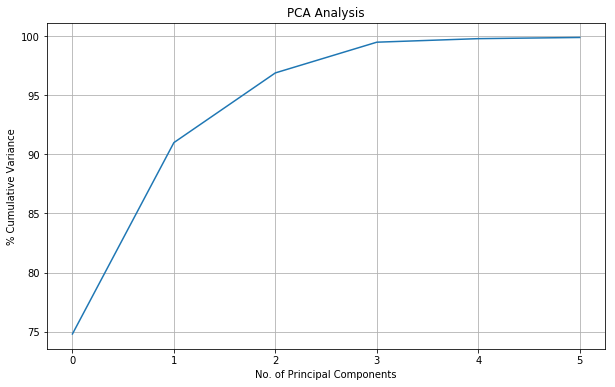

In [ ]:
#Plot the variance

fig = plt.figure(figsize=(10, 6))
plt.ylabel('% Cumulative Variance')
plt.xlabel('No. of Principal Components')
plt.title('PCA Analysis')

plt.grid(True)#show grid
plt.plot(variance2)

This curve quantifies how much of the total, 6-dimensional variance is contained within the first N components. 

We see that the first 2 components contain approximately 91% of the variance, while we need around 4 components to describe close to 100% of the variance.

We see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need at least 2 components to retain 90% of the variance. 

### Random Forest with PCA

Construct a PCA and Random Forest Regressor pipeline. A pipeline is a term for the processing of data until it reaches a form that is usable for the machine learning algorithm. Now there is an actual pipeline module you'll need to use, that streamlines the process of dimension reduction and application of the machine learning algorithm, in this case the random forest regression model. For now, use the first two principal components to construct the pipeline.

In [ ]:
pca2 = PCA(n_components=2)#as directed in the notebook, use 2.
X_train2 = pca2.fit_transform(X_train)
X_test2 = pca2.transform(X_test) 

rfr = RFR(n_estimators=100)#RFR() is RandomForestRegressor from import above
#put n_estimators as 100 since software warns that future default would be 100
pipeline = Pipeline(steps=[('pca', pca2), ('randomforest', rfr)])

In [ ]:
X_train2

array([[-2.87562553e+03,  3.73849836e+00],
       [-2.74755519e+03, -2.53568548e+00],
       [ 6.51795225e+02,  8.35825661e+00],
       ...,
       [ 2.39283048e+03, -2.19319271e+00],
       [-2.87562847e+03, -4.05927360e+00],
       [ 2.57094102e+03, -2.89423535e+00]])

In [ ]:
print ('Training data: ', X_train2.shape, y_train.shape)
print ('Test data: ', X_test2.shape, y_test.shape)

Training data:  (20000, 2) (20000,)
Test data:  (5000, 2) (5000,)


The above results show that the dimension has reduced from 6 to 2

##### Cross-validation

In [ ]:
"""
Instead of 'just' fitting the pipeline on the training data, 
I'll do cross-validation too so that I'll know if it's
overfitting.
This returns an array of values, each having the score for an individual run.
cv=10 means that we're doing 10-fold cross validation
"""
scores = cross_val_score(pipeline,X_train2,y_train,cv=10,
    scoring='neg_mean_squared_error')
scores

array([-45.16494618, -41.14468122, -40.04975807, -39.1613809 ,
       -46.95380805, -47.34081189, -47.21569078, -40.72617854,
       -42.58156316, -49.36157744])

In [ ]:
print (scores.mean(), scores.std())

-43.9700396237429 3.4672852596006276


In [ ]:
model = pipeline.fit(X_train2, y_train)

In [ ]:
pipeline.score(X_train2, y_train)

0.9999839120321651

In [ ]:
y_pred = pipeline.predict(X_test2)

In [ ]:
# Score
pipeline.score(X_test2, y_test)

0.9998549239606345

The scores between test and training data differs by an extremely small margin

### Plot the principal components

Select the first two components and display them. As rule of thumb, the first two components are selected as they are easier to display in a 2-dimensions.

In [ ]:
y_train

array([-1.2800000e+00,  1.2990000e+01,  6.2764001e+02, ...,
        9.8988000e+02, -2.0999999e-01,  1.0286100e+03])

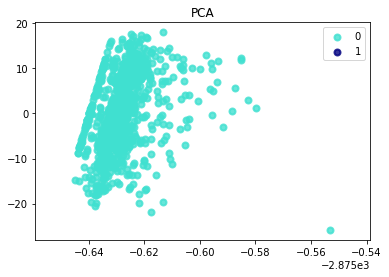

In [ ]:
plt.figure()
colors = ['turquoise', 'navy', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1], [0, 1]):
    plt.scatter(X_train2[y_train==i, 0], X_train2[y_train==i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')

plt.show()

### Split dataset in training and test sets

Split the data into training and test sets and use the pipeline to fit and test the model.

This has been done above already

### Evaluate the results

Using the `sklearn.metrics` moduel determine the accuracy score, i.e., the coefficient of determination $R^2$ of the prediction.

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.4981341310289857
Mean Squared Error: 54.45085745832785
Root Mean Squared Error: 7.3790824265844766


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.9998549239606345

In [ ]:
mean_squared_error(y_test, y_pred)

54.45085745832785

An r2 score of 0.99 is generally a good score

### References

Referred to for determination of input features to predict power output: [Forecasting Wind Power](https://lucdemortier.github.io/articles/17/WindPower).

[Selecting good features – Part IV: stability selection, RFE and everything side by side](http://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/)